# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Salma Oktarina]
- **Email:** [salmaoktarina14@gmail.com]
- **ID Dicoding:** [salmaaja14]

## Menentukan Pertanyaan Bisnis

- Apakah jumlah peminjaman sepeda meningkat setiap tahun?
- Apakah cuaca cerah mempengaruhi jumlah peminjaman sepeda menjadi lebih banyak?
- Pada musim apa jumlah peminjaman sepeda paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df menampilkan jumlah peminjaman sepeda per hari, meliputi tanggal, musim, tahun, bulan, hari libur, hari dalam seminggu, hari kerja, cuaca, suhu, suhu yang dirasakan, kelembapan, kecepatan angin, jumlah pengguna tidak terdaftar, jumlah pengguna terdaftar.
- hour_df menampilkan jumlah peminjaman sepeda per jam, meliputi tanggal, musim, tahun, bulan, jam, hari libur, hari dalam seminggu, hari kerja, cuaca, suhu, suhu yang dirasakan, kelembapan, kecepatan angin, jumlah pengguna tidak terdaftar, jumlah pengguna terdaftar.

### Assessing Data

In [41]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [43]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


In [44]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [45]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [46]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [47]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [48]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- data day_df dan hour_df tidak menemukan kesalahan missing value, duplikasi data, dan inaccurate data, tetapi pada tipe data akan diubah menjadi datetime pada tahap cleaning data.
- saya juga akan mengubah kolom musim, tahun, bulan, hari, dan cuaca agar dapat dibaca dengan mudah maka perlu mengubahnya pada tahap cleaning data.

### Cleaning Data

In [49]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [50]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [51]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [53]:
day_df["season"] = day_df["season"].replace({
        1: "Semi",
        2: "Panas",
        3: "Gugur",
        4: "Dingin"
})

In [54]:
day_df["yr"] = day_df["yr"].replace({
    0: "2011",
    1: "2012",
})

In [55]:
day_df["mnth"] = day_df["mnth"].replace({
    1: "Jan",
    2: "Feb",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Ags",
    9: "Sept",
    10: "Okt",
    11: "Nov",
    12: "Des"
})

In [56]:
day_df["weekday"] = day_df["weekday"].replace({
    0: "Senin",
    1: "Selasa",
    2: "Rabu",
    3: "Kamis",
    4: "Jumat",
    5: "Sabtu",
    6: "Minggu"
})

In [57]:
day_df["weathersit"] = day_df["weathersit"].replace({
    1: "Cerah",
    2: "Berawan",
    3: "Salju ringan",
    4: "Hujan deras",
})

In [58]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
391,392,2012-01-27,Semi,2012,Jan,0,Sabtu,1,Berawan,0.425000,0.415383,0.741250,0.342667,269,3187,3456
356,357,2011-12-23,Semi,2011,Des,0,Sabtu,1,Cerah,0.373333,0.377513,0.686250,0.274246,163,2046,2209
467,468,2012-04-12,Panas,2012,April,0,Jumat,1,Cerah,0.397500,0.387604,0.466250,0.290429,663,4746,5409
139,140,2011-05-20,Panas,2011,Mei,0,Sabtu,1,Cerah,0.536667,0.529042,0.719583,0.125013,909,4008,4917
236,237,2011-08-25,Gugur,2011,Ags,0,Jumat,1,Berawan,0.684167,0.645854,0.771667,0.210833,435,3107,3542


In [59]:
hour_df["season"] = hour_df["season"].replace({
        1: "Semi",
        2: "Panas",
        3: "Gugur",
        4: "Dingin"
})

In [60]:
hour_df["yr"] = hour_df["yr"].replace({
    0: "2011",
    1: "2012",
})

In [61]:
hour_df["mnth"] = hour_df["mnth"].replace({
    1: "Jan",
    2: "Feb",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Ags",
    9: "Sept",
    10: "Okt",
    11: "Nov",
    12: "Des"
})

In [62]:
hour_df["weekday"] = hour_df["weekday"].replace({
    0: "Senin",
    1: "Selasa",
    2: "Rabu",
    3: "Kamis",
    4: "Jumat",
    5: "Sabtu",
    6: "Minggu"
})

In [63]:
hour_df["weathersit"] = hour_df["weathersit"].replace({
    1: "Cerah",
    2: "Berawan",
    3: "Salju ringan",
    4: "Hujan deras",
})

In [64]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9792,9793,2012-02-17,Semi,2012,Feb,23,0,Sabtu,1,Cerah,0.36,0.3485,0.40,0.1940,10,72,82
15182,15183,2012-09-29,Dingin,2012,Sept,19,0,Minggu,0,Cerah,0.52,0.5000,0.55,0.1642,119,351,470
6730,6731,2011-10-13,Dingin,2011,Okt,0,0,Jumat,1,Berawan,0.54,0.5152,0.94,0.1343,1,14,15
2054,2055,2011-03-31,Panas,2011,Maret,11,0,Jumat,1,Salju ringan,0.28,0.2727,0.93,0.1940,6,52,58
7854,7855,2011-11-28,Dingin,2011,Nov,22,0,Selasa,1,Berawan,0.52,0.5000,0.83,0.1045,7,102,109


In [65]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,2012,Jan,NaN,Minggu,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [66]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,2012,Juli,NaN,NaN,Minggu,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- melakukan pengubahan tipe data pada dteday menjadi datetime
- melakukan pengubahan isi data musim, tahun, bulan, hari, dan cuaca.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [67]:
day_df.groupby(by="yr").agg({
    "instant" : "nunique",
    "cnt" : "sum"
})

,instant,cnt
yr,,
2011,365,1243103
2012,366,2049576


In [68]:
day_df.groupby(by="yr").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"})

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


### Explore hour_df

In [69]:
hour_df.groupby(by="weathersit").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"})

,casual,registered,cnt
weathersit,,,
Berawan,134481,661471,795952
Cerah,462745,1875428,2338173
Hujan deras,8,215,223
Salju ringan,22783,135548,158331


In [70]:
hour_df.groupby(by="weathersit").cnt.sum()

weathersit
Berawan          795952
Cerah           2338173
Hujan deras         223
Salju ringan     158331
Name: cnt, dtype: int64

In [71]:
hour_df.groupby(by="season").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"})

,casual,registered,cnt
season,,,
Dingin,129782,711831,841613
Gugur,226091,835038,1061129
Panas,203522,715067,918589
Semi,60622,410726,471348


**Insight:**
- pada day_df melihat jumlah peminjaman sepeda per tahun untuk menjawab pertanyaan 1.
- pada hour_df melihat jumlah peminjaman sepeda berdasarkan cuaca dan musim untuk menjawab pertanyaan no 2 dan 3.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah peminjaman sepeda meningkat?

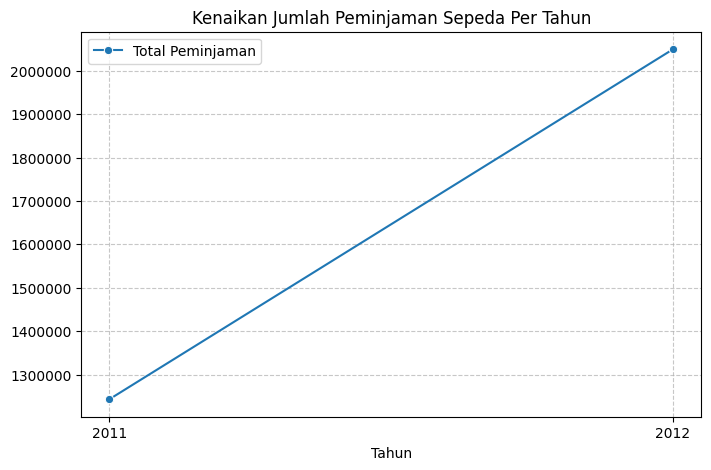

In [72]:
# 1 line chart
byear_df = day_df.groupby(by="yr").agg({
    "instant" : "nunique",
    "cnt" : "sum"
}).reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=byear_df, x="yr", y="cnt", marker="o", label="Total Peminjaman")

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(["2011", "2012"])

plt.title("Kenaikan Jumlah Peminjaman Sepeda Per Tahun")
plt.xlabel("Tahun")
plt.ylabel(None)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.show()

### Pertanyaan 2: Apakah cuaca cerah mempengaruhi jumlah peminjaman sepeda menjadi lebih banyak?

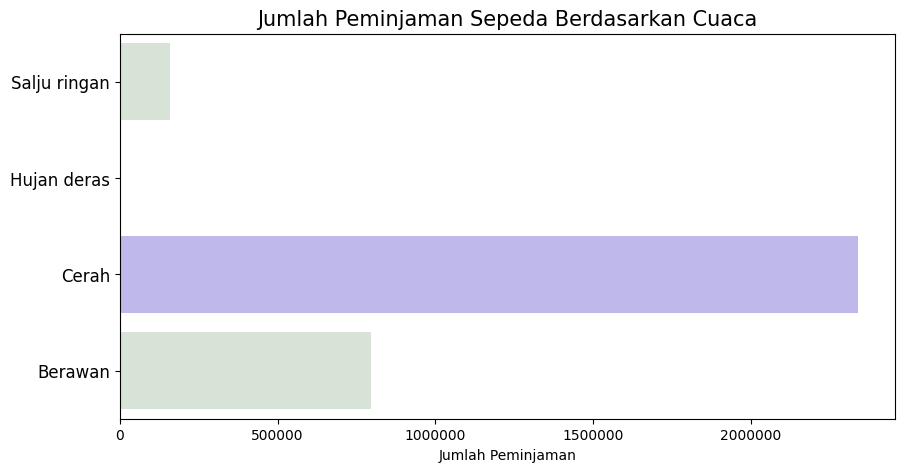

In [73]:
# 2 bar chart
# untuk cuaca hujan lebat jumlahnya sedikit jadi tidak terlihat bar nya
byweather_df = hour_df.groupby(by="weathersit").cnt.sum().reset_index()

plt.figure(figsize=(10, 5))
colors_ = ["#D5E5D5", "#D5E5D5", "#B7B1F2", "#D5E5D5"]
sns.barplot(
    y="weathersit", 
    x="cnt",
    data=byweather_df.sort_values(by="weathersit", ascending=False),
    hue="weathersit",
    palette=colors_
)

plt.title("Jumlah Peminjaman Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Jumlah Peminjaman")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis='y', labelsize=12)

plt.show()

### Pertanyaan 3: Pada musim apa jumlah peminjaman sepeda paling sedikit?

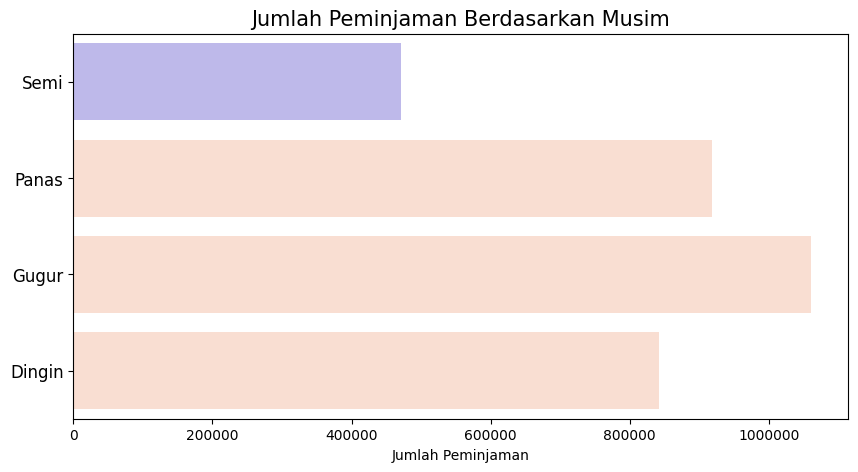

In [74]:
# 3 bar chart
byseason_df = hour_df.groupby(by="season").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
}).reset_index()

plt.figure(figsize=(10, 5))
colors_ = ["#B7B1F2", "#FFDCCC", "#FFDCCC", "#FFDCCC"]
sns.barplot(
    y="season",
    x="cnt",
    data=byseason_df.sort_values(by="season", ascending=False),
    hue="season",
    palette=colors_
)

plt.title("Jumlah Peminjaman Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Jumlah Peminjaman")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis='y', labelsize=12)

plt.show()

**Insight:**
- line chart pada pertanyaan 1 visualisasi dari kenaikan jumlah peminjaman sepeda per tahun, dimana terdapat peningkatan dari tahun 2011 ke tahun 2012
- bar chart pada pertanyaan 2 visualisasi dari pengaruh cuaca membuat perbedaan yang siginifikan terkait jumlah peminjaman sepeda, dimana cuaca cerah menjadi favorit bagi orang-orang yang ingin bersepeda.
- untuk visualisas
- bar char pada pertanyaan 3 visualisasi dari jumlah peminjaman sepeda berdasaran musim, dimana pada musim semi jumlahnya paling sedikit.

## Analisis Lanjutan (Opsional)

## Conclusion

- kesimpulannya terdapan kenaikan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012.
- pengaruh cuaca membuat perbedaan yang signifikan terkait jumlah peminjaman sepeda, dimana cuaca cerah menjadi cuara terfavorit untuk bersepeda.
- perubahan musim juga berpengaruh bagi jumlah peminjaman sepeda, bisa dilihat ternyata jumlah peminjaman sepeda paling sedikit ada di musim semi.